In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("~\Desktop\JOTFORM\Summer2023\Anomaly-Detection\data\grouped_data.csv")

In [3]:
industries = pd.read_csv("~\Desktop\JOTFORM\Summer2023\Anomaly-Detection\data\industry_data.csv")

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6902 entries, 0 to 6901
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   6902 non-null   int64         
 1   date         6902 non-null   datetime64[ns]
 2   cluster      6902 non-null   object        
 3   keyword_sum  6902 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 215.8+ KB


In [7]:
industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   industry  34 non-null     object
dtypes: object(1)
memory usage: 400.0+ bytes


In [4]:
sns.set(style="whitegrid")

In [17]:
clusters = data['cluster'].unique()

In [21]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

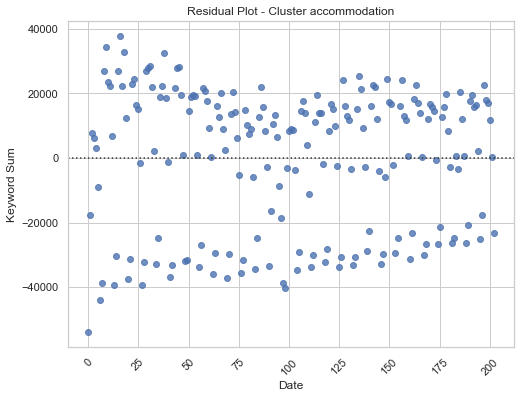

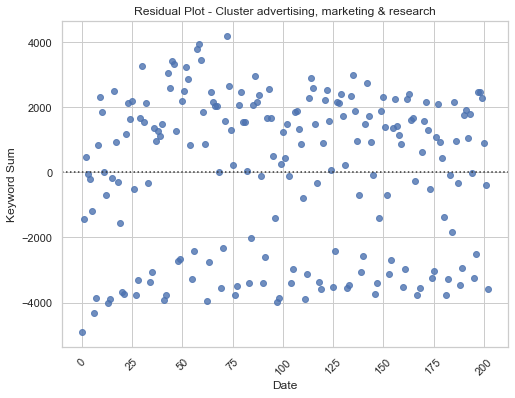

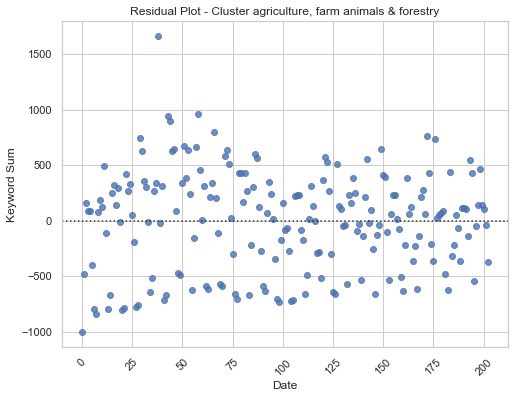

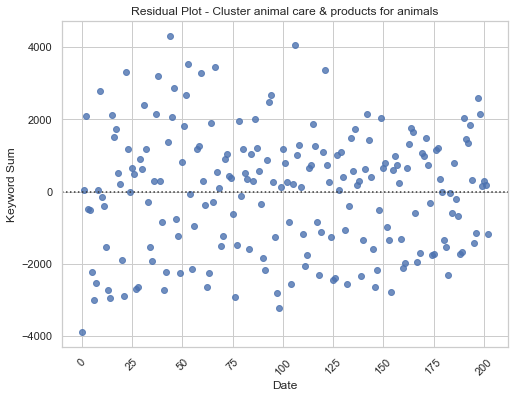

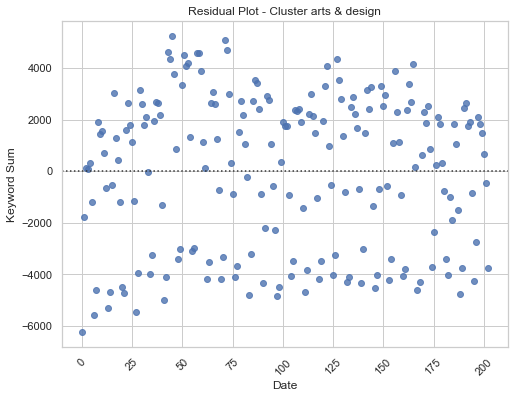

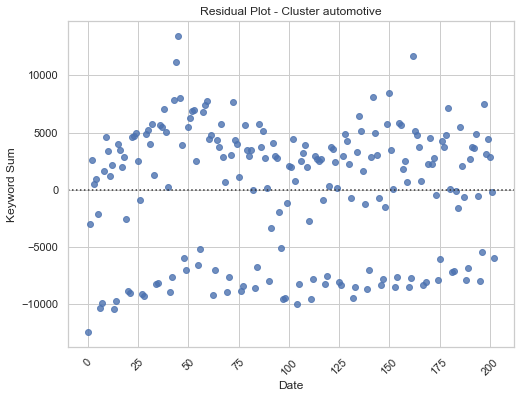

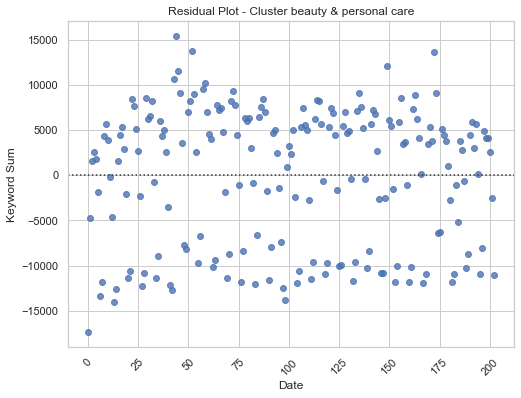

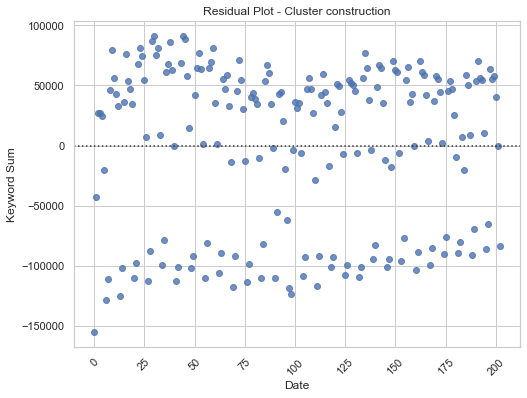

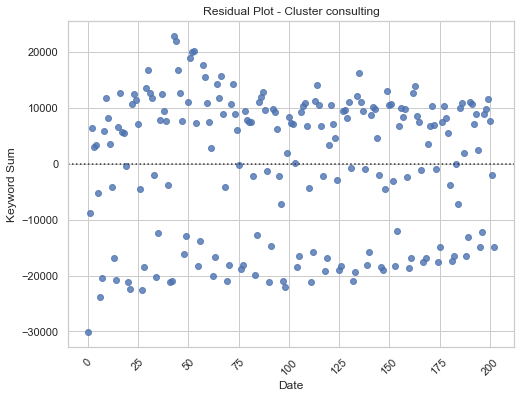

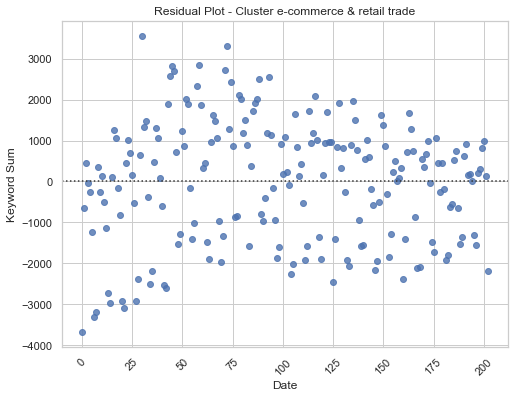

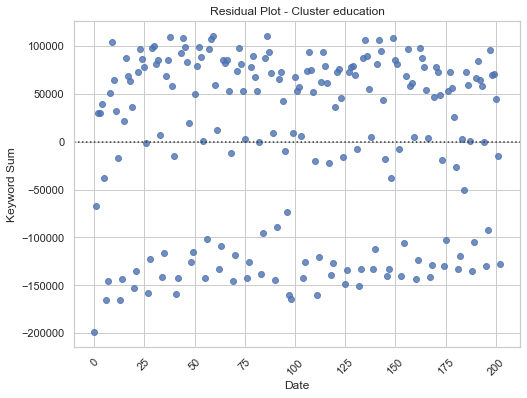

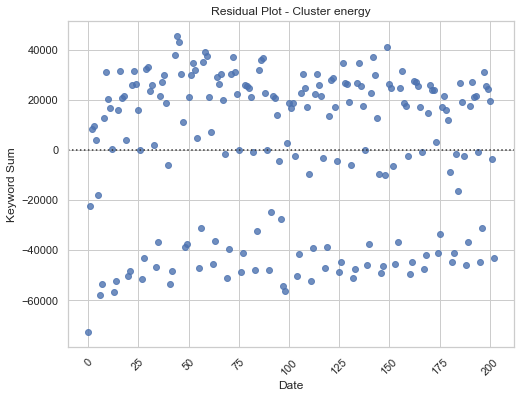

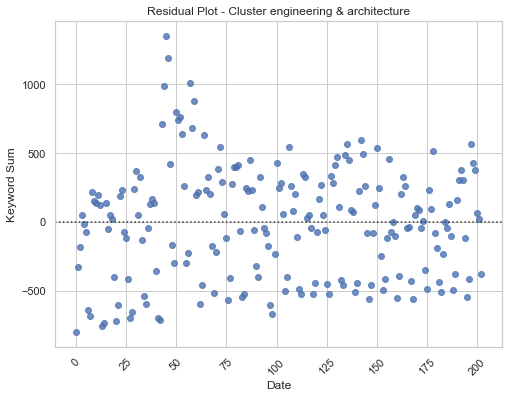

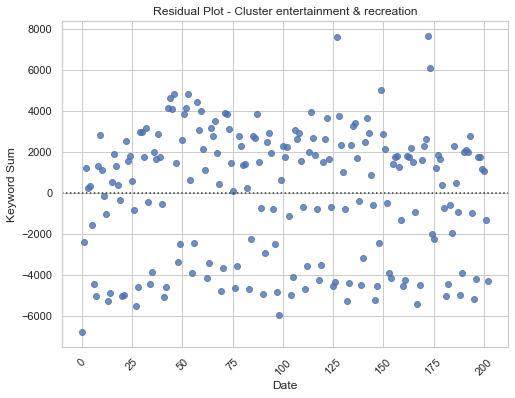

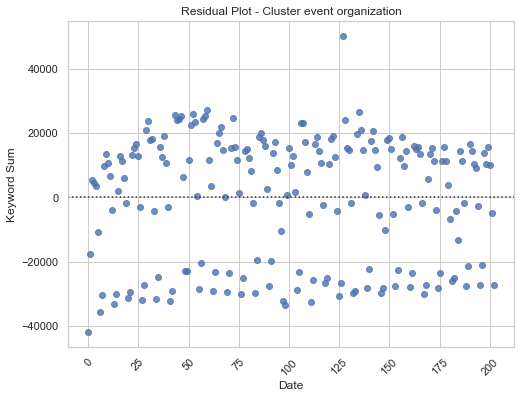

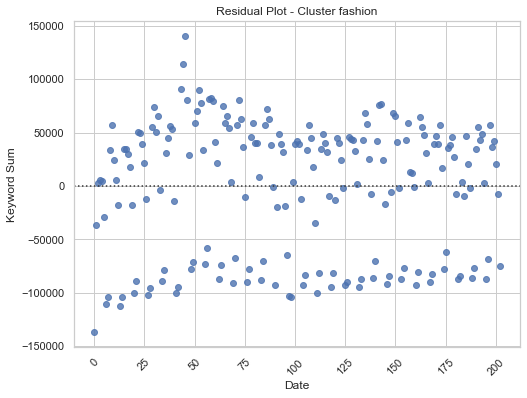

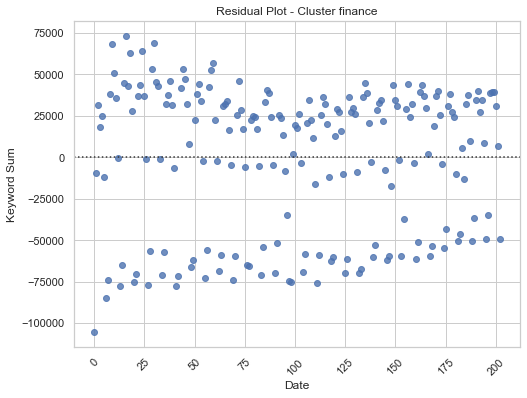

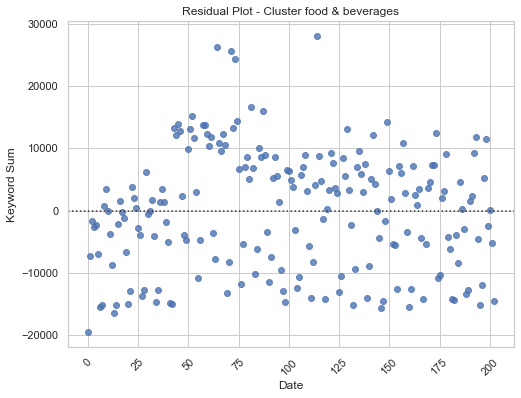

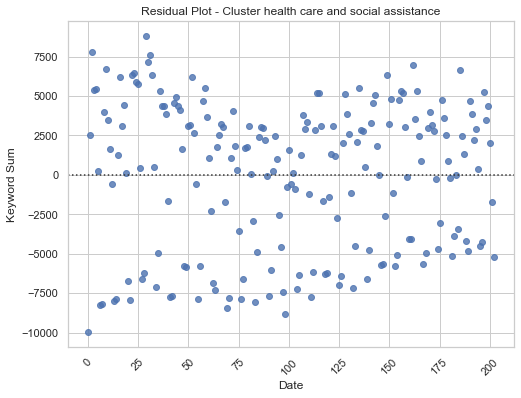

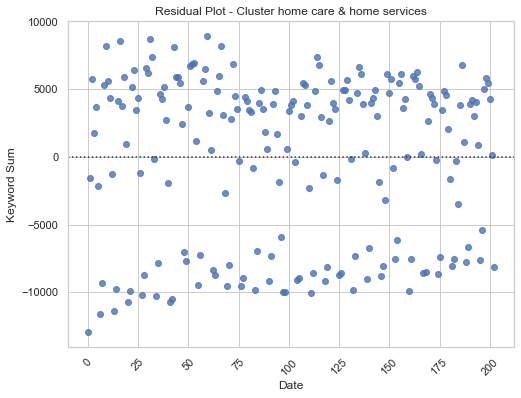

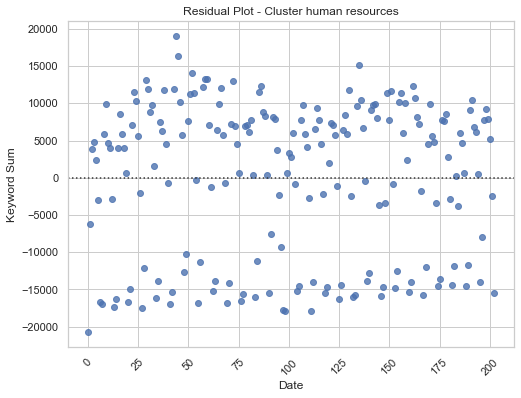

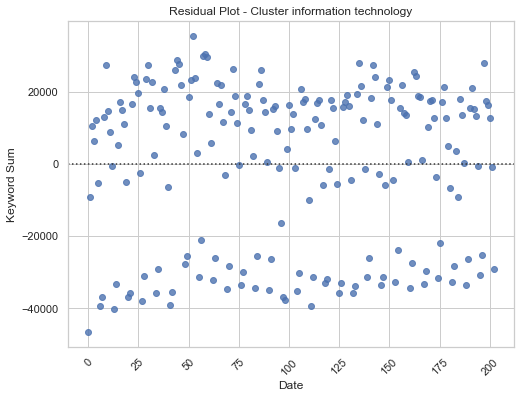

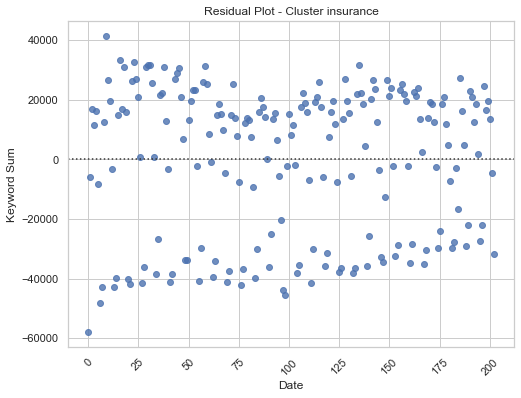

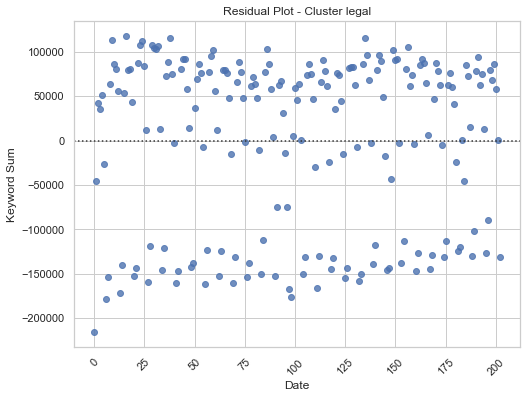

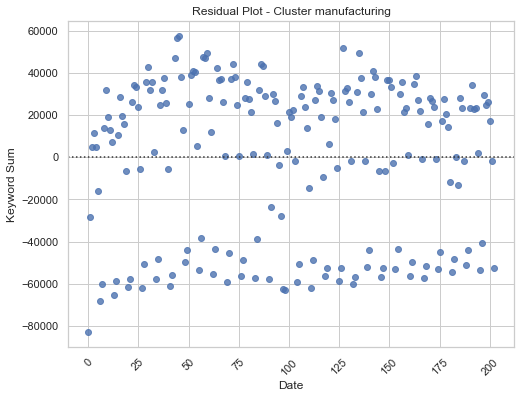

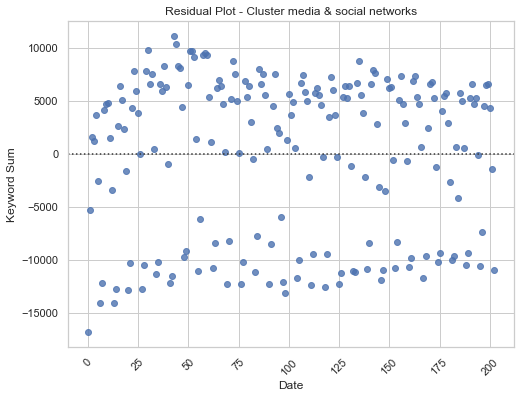

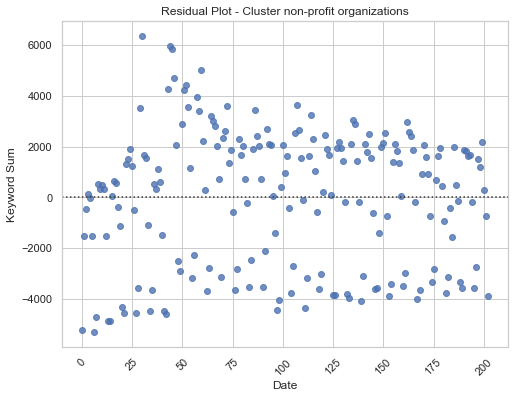

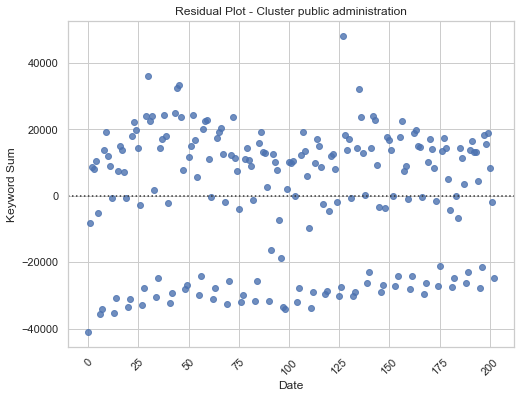

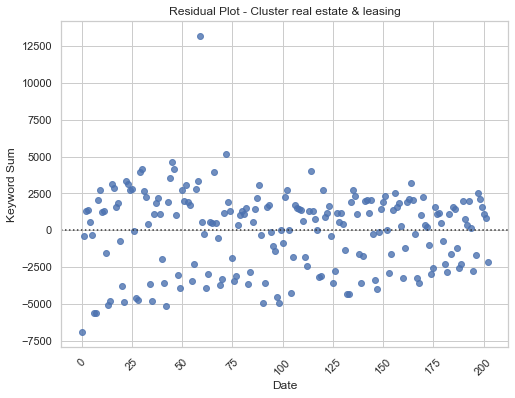

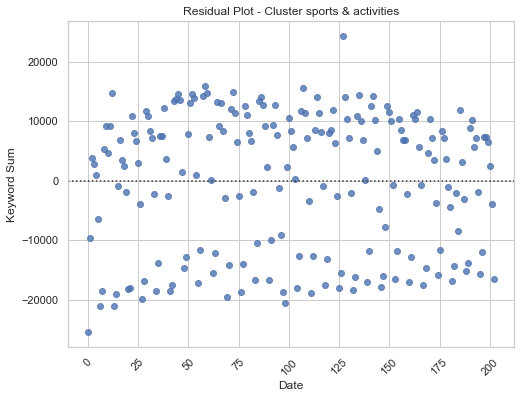

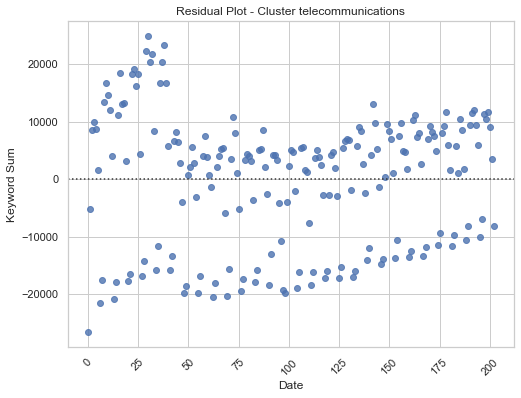

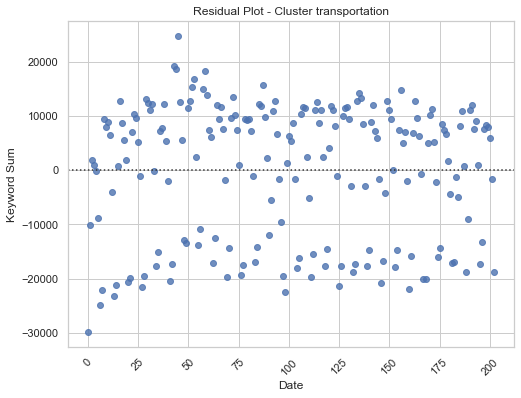

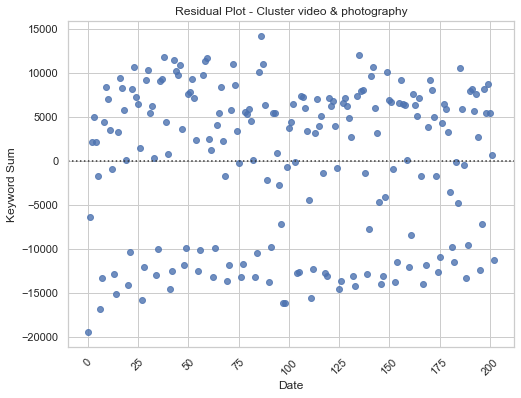

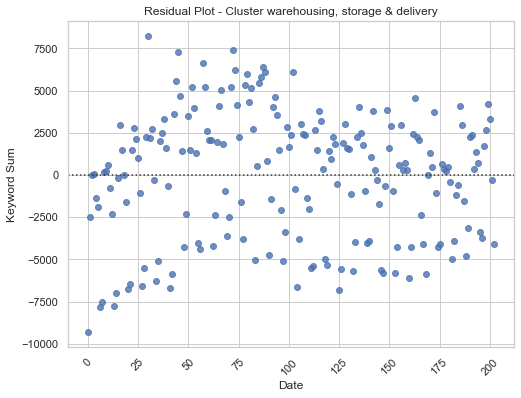

In [25]:
for cluster in clusters:
    cluster_data = data[data['cluster'] == cluster]
    plt.figure(figsize=(8, 6))
    sns.residplot(x=list(range(0, len(cluster_data))), y='keyword_sum', data=cluster_data, color='b')
    plt.title(f'Residual Plot - Cluster {cluster}')
    plt.xlabel('Date')
    plt.ylabel('Keyword Sum')
    plt.xticks(rotation=45)
    plt.show()

In [26]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [32]:
data['cluster_num'] = pd.Categorical(data['cluster']).codes

<Figure size 576x432 with 0 Axes>

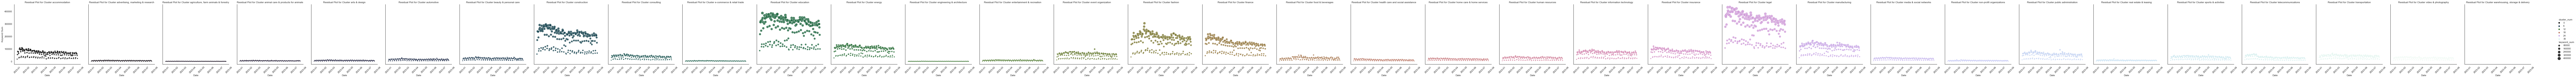

In [52]:
plt.figure(figsize=(8, 6))
cmap = sns.color_palette("cubehelix", as_cmap=True)
g = sns.relplot(x='date', y='keyword_sum', data=data, hue='cluster_num', size='keyword_sum',
            palette=cmap, sizes=(20, 200), alpha=0.8, col='cluster')
g.set_titles("Residual Plot for Cluster {col_name}")
g.set_axis_labels('Date', 'Keyword Sum')
g.set_xticklabels(rotation=45)
plt.show()